# COGS 108 - EDA Checkpoint

# Names
- Alan Miyazaki
- Alex Guan
- Nathan Ahmann
- Renaldy Herlim

<a id='research_question'></a>
# Research Question

Does crime happen more or less frequently around police stations and can that knowledge be used to more effectively distribute police station locations?

# Setup

In [18]:
import pandas as pd
import datetime

# Data Cleaning

Describe your data cleaning steps here.

In [19]:
# Reading datasets from two different time periods

# https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z
past_df = pd.read_csv("Crime_Data_from_2010_to_2019.csv", dtype = {"TIME OCC": str})
# https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8
present_df = pd.read_csv("Crime_Data_from_2020_to_Present.csv", dtype = {"TIME OCC": str})

LAPD_df = pd.read_csv("LAPD_Police_Stations.csv")

# past dataset has column name typo
past_df = past_df.rename(columns={"AREA ": "AREA"})

# Both datasets use the same columns 
df = pd.concat([past_df, present_df])

In [20]:
# Dropping code columns since these are internal use and we don't get much 
# value from them given we have their description in a seperate column
df = df.drop(columns=[
    "Crm Cd", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", 
    "Crm Cd 4", "Premis Cd", "Weapon Used Cd", 
    "Mocodes", "Part 1-2", "Status", "Date Rptd"
    ])

# Changed code to be readable description
df["Vict Descent"] = df["Vict Descent"].replace({
                            "A": "Other Asian", 
                            "B": "Black", 
                            "C": "Chinese", 
                            "D": "Cambodian", 
                            "F": "Filipino", 
                            "G": "Guamanian", 
                            "H": "Hispanic/Latin/Mexican", 
                            "I": "American Indian/Alaskan Native", 
                            "J": "Japanese", 
                            "K": "Korean", 
                            "L": "Laotian", 
                            "O": "Other", 
                            "P": "Pacific Islander", 
                            "S": "Samoan", 
                            "U": "Hawaiian", 
                            "V": "Vietnamese", 
                            "W": "White", 
                            "X": "Unknown", 
                            "Z": "Asian Indian",
                        })

# Renamed X,Y to Longitude, Latitude
LAPD_df = LAPD_df.rename(columns={
    "X": "Longitude", 
    "Y": "Latitude"
    })

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [21]:
df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,1350,13,Newton,1385,VIOLATION OF COURT ORDER,48,M,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,NaN,Adult Arrest,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/12/2010 12:00:00 AM,0045,14,Pacific,1485,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,White,STREET,NaN,Invest Cont,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,1515,13,Newton,1324,OTHER MISCELLANEOUS CRIME,0,M,Hispanic/Latin/Mexican,ALLEY,NaN,Invest Cont,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,0150,6,Hollywood,646,VIOLATION OF COURT ORDER,47,F,White,STREET,HAND GUN,Invest Cont,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/02/2010 12:00:00 AM,2100,1,Central,176,"RAPE, ATTEMPTED",47,F,Hispanic/Latin/Mexican,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST,SAN PEDRO ST,34.0387,-118.2488


One thing that we would be interested in knowing is if there is an equal distribution of crimes between police stations. From this we can see that there is a difference between how many cases each station has handled. This could either mean that some police stations are responsible for a larger area or there are more crimes happening in the areas those stations are covering. 

In [22]:
import matplotlib.pyplot as plt

<Axes: >

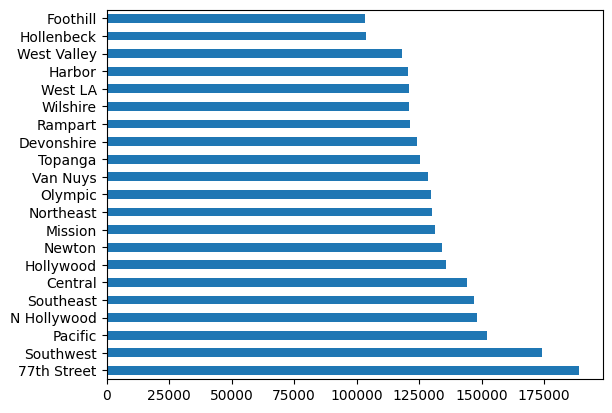

In [23]:
df["AREA NAME"].value_counts().plot(kind="barh")

In [24]:
df["Crm Cd Desc"].unique()

array(['VIOLATION OF COURT ORDER',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'OTHER MISCELLANEOUS CRIME', 'RAPE, ATTEMPTED',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'BURGLARY FROM VEHICLE',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BATTERY - SIMPLE ASSAULT', 'ROBBERY', 'BOMB SCARE',
       'CHILD NEGLECT (SEE 300 W.I.C.)',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'ATTEMPTED ROBBERY',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'BURGLARY', 'ARSON',
       'RAPE, FORCIBLE', 'BRANDISH WEAPON',
       'THROWING OBJECT AT MOVING VEHICLE',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
       'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
       'SHOTS FIRED AT INHABITED DWELLING', 'VEHICLE - STOLEN',
    

In [25]:
df["TIME OCC"].value_counts()

1200    140645
1800     80561
2000     75298
1700     72411
1900     71000
         ...  
0543        32
0534        30
0431        25
0531        22
0551        19
Name: TIME OCC, Length: 1439, dtype: int64

This is to see when do most crimes happen. From this we can see that the most common hour for a crime to occur over the past 13 years was at noon. The least common time for a crime to occur was at 5 am. However this is a massive spike at 12 which is odd. A reason for this could be that the dataset only counts crimes reported which means that since it is noon, more people are out and can see/report on a crime. In contrast, people are sleeping at night so there are less people reporting crimes. Another reason for this could be that when a crime happens, they are more focused on the criminal instead of what time it is so when they make a report to an officer, they may choose noon due to it being daylight.

<Axes: >

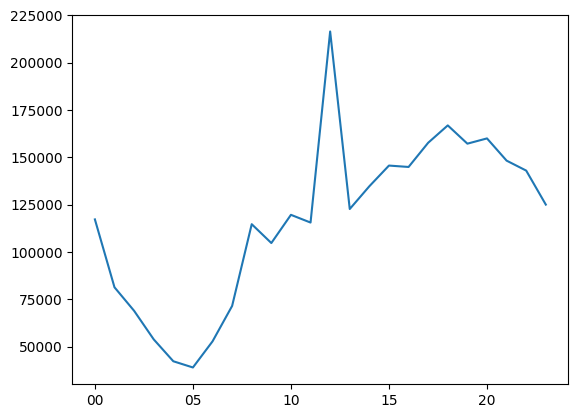

In [26]:
df["TIME OCC"].str[:2].value_counts().sort_index().plot()

In [27]:
df["TIME OCC"].str[:2].value_counts()

12    216387
18    166780
20    159912
17    157612
19    157135
21    148173
15    145565
16    144829
22    142909
14    134643
23    124953
13    122620
10    119551
00    117138
11    115466
08    114609
09    104651
01     81268
07     71435
02     68859
03     53780
06     52716
04     42213
05     38928
Name: TIME OCC, dtype: int64

In [28]:
df["TIME OCC"].value_counts()

1200    140645
1800     80561
2000     75298
1700     72411
1900     71000
         ...  
0543        32
0534        30
0431        25
0531        22
0551        19
Name: TIME OCC, Length: 1439, dtype: int64

In [29]:
df["DATE OCC"].value_counts().sort_index()

01/01/2010 12:00:00 AM    2311
01/01/2011 12:00:00 AM    2248
01/01/2012 12:00:00 AM    1859
01/01/2013 12:00:00 AM    1695
01/01/2014 12:00:00 AM    1597
                          ... 
12/31/2018 12:00:00 AM     607
12/31/2019 12:00:00 AM     554
12/31/2020 12:00:00 AM     573
12/31/2021 12:00:00 AM     571
12/31/2022 12:00:00 AM     556
Name: DATE OCC, Length: 4820, dtype: int64

<Axes: >

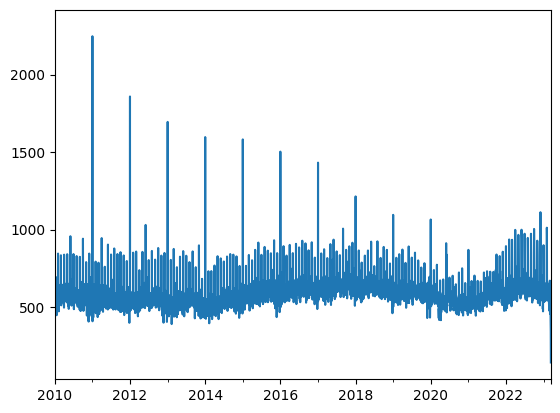

In [30]:
pd.to_datetime(df["DATE OCC"]).value_counts().sort_index().plot()

Seems like there are more crimes happening during new years?

In [31]:
df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,1350,13,Newton,1385,VIOLATION OF COURT ORDER,48,M,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,NaN,Adult Arrest,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/12/2010 12:00:00 AM,0045,14,Pacific,1485,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,White,STREET,NaN,Invest Cont,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,1515,13,Newton,1324,OTHER MISCELLANEOUS CRIME,0,M,Hispanic/Latin/Mexican,ALLEY,NaN,Invest Cont,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,0150,6,Hollywood,646,VIOLATION OF COURT ORDER,47,F,White,STREET,HAND GUN,Invest Cont,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/02/2010 12:00:00 AM,2100,1,Central,176,"RAPE, ATTEMPTED",47,F,Hispanic/Latin/Mexican,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [32]:
pd.to_datetime(df["DATE OCC"]).value_counts()

2010-01-01    2311
2011-01-01    2248
2012-01-01    1859
2013-01-01    1695
2014-01-01    1597
              ... 
2011-12-26     398
2014-02-09     395
2013-02-09     390
2023-03-12     343
2023-03-13     142
Name: DATE OCC, Length: 4820, dtype: int64

Number of crimes reported plotted by month and year

<Axes: >

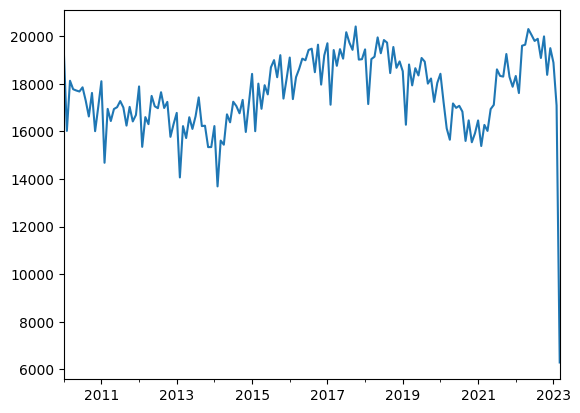

In [33]:
pd.to_datetime(df["DATE OCC"]).dt.to_period('M').value_counts().sort_index().plot()

In [34]:
pd.to_datetime(df["DATE OCC"]).dt.to_period('M').value_counts()

2017-10    20410
2022-05    20302
2017-07    20169
2022-06    20058
2022-10    19993
           ...  
2013-11    15340
2011-02    14681
2013-02    14065
2014-02    13688
2023-03     6287
Freq: M, Name: DATE OCC, Length: 159, dtype: int64

This is number of crims reported over years. 2023 is extremely low because the year is going on.

<Axes: >

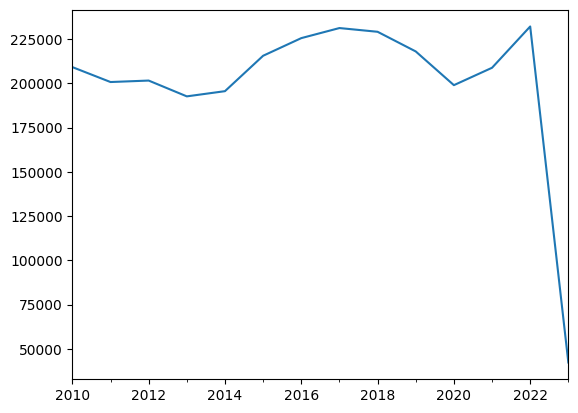

In [35]:
pd.to_datetime(df["DATE OCC"]).dt.to_period('Y').value_counts().sort_index().plot()

In [36]:
pd.to_datetime(df["DATE OCC"]).dt.to_period('Y').value_counts()

2022    232194
2017    231303
2018    229197
2016    225609
2019    218088
2015    215641
2010    209229
2021    208854
2012    201621
2011    200792
2020    199022
2014    195628
2013    192689
2023     42265
Freq: A-DEC, Name: DATE OCC, dtype: int64

Removing 2023 to get a better graph. We can see some oddities. 2013, 2014, and 2020 are low in comparison to other years. 2020 is likely due to the pandemic since everyone was encouraged to stay at home which leads to less crimes reported (and maybe less crimes happening?). I have no idea of any reason to explain why 2013 and 2014 are so low. In addition its a bit weird that crime starts picking to make a curve at 2017. Also a massive spite at 2022 as well but not too sure of the reason there. 

<Axes: >

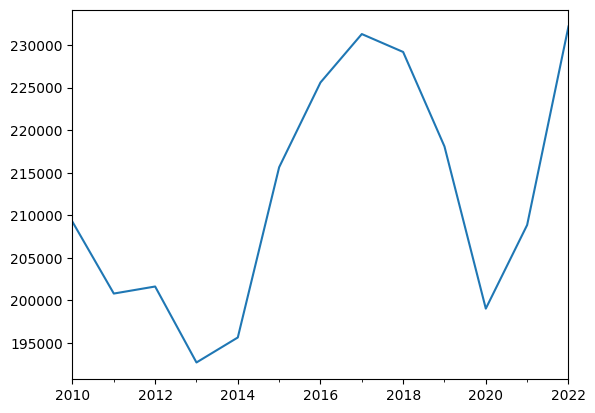

In [37]:
pd.to_datetime(df["DATE OCC"]).dt.to_period('Y').value_counts().sort_index()[:-1].plot()

In [70]:
LAPD_df.head()

,Longitude,Latitude,OBJECTID,DIVISION,LOCATION,PREC
0,-118.289242,33.757661,1,HARBOR,2175 JOHN S. GIBSON BLVD.,5
1,-118.275394,33.938627,2,SOUTHEAST,145 W. 108TH ST.,18
2,-118.277670,33.970307,3,77TH STREET,7600 S. BROADWAY,12
3,-118.419842,33.991655,4,PACIFIC,12312 CULVER BLVD.,14
4,-118.305142,34.010575,5,SOUTHWEST,1546 MARTIN LUTHER KING JR. BLVD.,3


## Looking at New Years data from 2010 to 2023

In [71]:
# Make a copy of the dataframe and create a new one with a datetime column for easy filtering
datetime_col = pd.to_datetime(df['DATE OCC'])
new_df = df.copy()
new_df['Date'] = datetime_col
new_df.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,Cross Street,LAT,LON,Date
0,1307355,02/20/2010 12:00:00 AM,1350,13,Newton,1385,VIOLATION OF COURT ORDER,48,M,Hispanic/Latin/Mexican,SINGLE FAMILY DWELLING,NaN,Adult Arrest,300 E GAGE AV,NaN,33.9825,-118.2695,2010-02-20
1,11401303,09/12/2010 12:00:00 AM,0045,14,Pacific,1485,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,M,White,STREET,NaN,Invest Cont,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,2010-09-12
2,70309629,08/09/2010 12:00:00 AM,1515,13,Newton,1324,OTHER MISCELLANEOUS CRIME,0,M,Hispanic/Latin/Mexican,ALLEY,NaN,Invest Cont,1300 E 21ST ST,NaN,34.0224,-118.2524,2010-08-09
3,90631215,01/05/2010 12:00:00 AM,0150,6,Hollywood,646,VIOLATION OF COURT ORDER,47,F,White,STREET,HAND GUN,Invest Cont,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,2010-01-05
4,100100501,01/02/2010 12:00:00 AM,2100,1,Central,176,"RAPE, ATTEMPTED",47,F,Hispanic/Latin/Mexican,ALLEY,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8TH ST,SAN PEDRO ST,34.0387,-118.2488,2010-01-02


In [72]:
# Create new dataframe that only contains crimes on New Years Day from 2010 - 2023
new_years = new_df[(new_df['Date'].dt.month == 1) & (new_df['Date'].dt.day == 1)]
new_years.head()

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,Cross Street,LAT,LON,Date
448,100104004,01/01/2010 12:00:00 AM,0130,1,Central,162,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",35,M,Other,POLICE FACILITY,BLUNT INSTRUMENT,Adult Arrest,7TH ST,FLOWER ST,34.0487,-118.2588,2010-01-01
449,100104006,01/01/2010 12:00:00 AM,0230,1,Central,171,BATTERY - SIMPLE ASSAULT,30,M,Hispanic/Latin/Mexican,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,OLYMPIC BL,FIGUEROA BL,34.0453,-118.2651,2010-01-01
450,100104007,01/01/2010 12:00:00 AM,0100,1,Central,111,BURGLARY FROM VEHICLE,32,M,Hispanic/Latin/Mexican,PARKING UNDERGROUND/BUILDING,NaN,Invest Cont,600 N HILL ST,NaN,34.0591,-118.2412,2010-01-01
451,100104012,01/01/2010 12:00:00 AM,1145,1,Central,152,BATTERY - SIMPLE ASSAULT,51,M,Hispanic/Latin/Mexican,OTHER/OUTSIDE,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,FLOWER,WILSHIRE,34.0494,-118.2581,2010-01-01
452,100104021,01/01/2010 12:00:00 AM,1130,1,Central,100,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",51,M,Black,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6TH ST,WALL ST,34.0428,-118.2461,2010-01-01


In [73]:
# Over 20,000 crimes committed on the 13 New Years day's alone!
new_years.shape

(20262, 18)

#### 13 days are accounting for over 20,000 crimes in total, with an average of 1558 per day

In [64]:
20262/13

1558.6153846153845

In [59]:
365 * 12 + (80)

4460

In [61]:
(df.shape[0] / 4460) * 13

8167.64932735426

In [63]:
new_years['Vict Descent'].value_counts()

Hispanic/Latin/Mexican            9225
White                             4166
Black                             3034
Other                             1796
Unknown                            508
Other Asian                        426
Korean                              85
Filipino                            52
Chinese                             20
Japanese                            12
American Indian/Alaskan Native      10
Vietnamese                           6
Hawaiian                             5
Pacific Islander                     4
Asian Indian                         4
Guamanian                            1
Cambodian                            1
Name: Vict Descent, dtype: int64

In [74]:
top_20 = new_years['Crm Cd Desc'].value_counts()[:20]
top_20

THEFT OF IDENTITY                                           6542
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)    1376
BATTERY - SIMPLE ASSAULT                                    1044
INTIMATE PARTNER - SIMPLE ASSAULT                            811
BURGLARY FROM VEHICLE                                        643
VEHICLE - STOLEN                                             623
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     599
BURGLARY                                                     595
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               584
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      560
THEFT PLAIN - PETTY ($950 & UNDER)                           524
RAPE, FORCIBLE                                               513
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              485
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     430
SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ     386
LETTERS, LEWD  -  TELEPHO

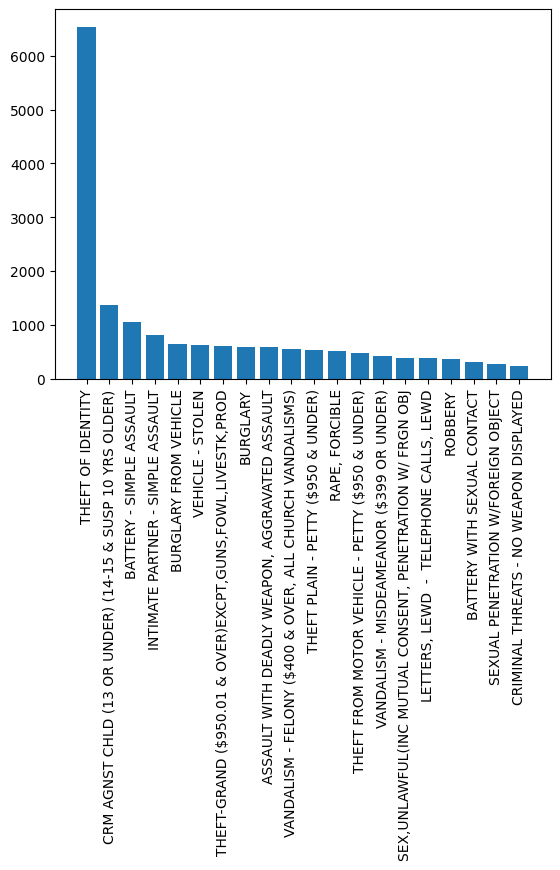

In [77]:
plt.bar(top_20.index, top_20)
plt.xticks(rotation = 90)
plt.show()